#DSCI 632 Group Project

**Leland Ly, Shawn Oyer, Ahmad Javed**

##Processing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
nbdir = "/content/gdrive/MyDrive/DSCI632_Group/Project"

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/DSCI632_Group/Project/

/content/gdrive/MyDrive/DSCI632_Group/Project


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
!wget https://dlcdn.apache.org/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz

--2024-08-22 13:28:52--  https://dlcdn.apache.org/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388930980 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.3-bin-hadoop3.tgz.11’

spark-3.4.3-bin-had 100%[===================>] 370.91M   121MB/s    in 3.1s    

2024-08-22 13:28:55 (121 MB/s) - ‘spark-3.4.3-bin-hadoop3.tgz.11’ saved [388930980/388930980]



In [5]:
!tar xvf spark-3.4.3-bin-hadoop3.tgz

spark-3.4.3-bin-hadoop3/
spark-3.4.3-bin-hadoop3/R/
spark-3.4.3-bin-hadoop3/R/lib/
spark-3.4.3-bin-hadoop3/R/lib/sparkr.zip
spark-3.4.3-bin-hadoop3/R/lib/SparkR/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/html/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/html/R.css
spark-3.4.3-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.4.3-bin-hadoop3/R/lib/SparkR/worker/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/worker/worker.R
spark-3.4.3-bin-hadoop3/R/lib/SparkR/worker/daemon.R
spark-3.4.3-bin-hadoop3/R/lib/SparkR/tests/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/tests/testthat/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.4.3-bin-hadoop3/R/lib/SparkR/profile/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/profile/shell.R
spark-3.4.3-bin-hadoop3/R/lib/SparkR/profile/general.R
spark-3.4.3-bin-hadoop3/R/lib/SparkR/doc/
spark-3.4.3-bin-hadoop3/R/lib/SparkR/doc/index.html
spark-3.4.3-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.4.3-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-

In [6]:
!pip install -q findspark

In [7]:
!pip install pyspark==3.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.3-py2.py3-none-any.whl size=311885495 sha256=54ac5e6a7079c506439a57a793cd1c6e8816b9f0dc8070ec241d0f7fe5c5e507
  Stored in directory: /root/.cache/pip/wheels/ea/a9/64/3713eb2c5048c18bae2778b013e5fc74203f5c22d4640fb776
Successfully built pyspark


In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.4.3-bin-hadoop3"

In [9]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName("DSCI632_Project").getOrCreate()

In [10]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import when
from pyspark.sql.functions import col, when, dayofmonth, dayofweek, month, year
from pyspark.sql.types import IntegerType, FloatType
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import mean
from pyspark.sql.types import IntegerType, FloatType, StringType, DoubleType
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline
import tensorflow as tf
import pickle

In [11]:
# Load the text files into DataFrames

df1 = spark.read.option("quote", "\"").option("escape", "\"").option("multiline", True).csv('./data/Fraudulent_E-Commerce_Transaction_Data.csv', inferSchema=True, header=True)
df2 = spark.read.option("quote", "\"").option("escape", "\"").option("multiline", True).csv('./data/Fraudulent_E-Commerce_Transaction_Data_2.csv', inferSchema=True, header=True)

# Print the feature counts
print(f"Total features in the first dataset: {df1.count()}")
print(f"Total features in the second dataset: {df2.count()}")

# Print the first 10 lines of each DataFrame
df1.show(10)
df2.show(10)

Total features in the first dataset: 1472952
Total features in the second dataset: 23634
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-------------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is Fraudulent|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-------------+----------------+----------------+
|15d2e414-8735-46f...|d1b87f62-51b2-493...|             58.09|2024-02-20 05:58:41| bank tran

In [12]:
# Concatenate the two data frames into one

# Combine DataFrames using union
combined_df = df1.union(df2)

# Print the number of rows and columns in the combined DataFrame
print(f"Total rows: {combined_df.count()}")
print(f"Total columns: {len(combined_df.columns)}")

# Replace spaces with underscores in column names
for col_name in combined_df.columns:
    new_col_name = col_name.replace(" ", "_")
    combined_df = combined_df.withColumnRenamed(col_name, new_col_name)

# Show the first 20 rows of the combined DataFrame
combined_df.show(20)

Total rows: 1496586
Total columns: 16
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-------------+----------------+----------------+
|      Transaction_ID|         Customer_ID|Transaction_Amount|   Transaction_Date|Payment_Method|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|     IP_Address|    Shipping_Address|     Billing_Address|Is_Fraudulent|Account_Age_Days|Transaction_Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-------------+----------------+----------------+
|15d2e414-8735-46f...|d1b87f62-51b2-493...|             58.09|2024-02-20 05:58:41| bank transfer|     electronics|       1|          17|    Ama

In [ ]:
# Get the schema (column names and data types)
combined_df.printSchema()

# Check for non-null values in each column
non_null_counts = combined_df.select([sum(col(c).isNotNull().cast("int")).alias(c) for c in combined_df.columns])

# Show non-null counts for each column
non_null_counts.show()

root
 |-- Transaction_ID: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Transaction_Amount: double (nullable = true)
 |-- Transaction_Date: timestamp (nullable = true)
 |-- Payment_Method: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Customer_Location: string (nullable = true)
 |-- Device_Used: string (nullable = true)
 |-- IP_Address: string (nullable = true)
 |-- Shipping_Address: string (nullable = true)
 |-- Billing_Address: string (nullable = true)
 |-- Is_Fraudulent: integer (nullable = true)
 |-- Account_Age_Days: integer (nullable = true)
 |-- Transaction_Hour: integer (nullable = true)

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-------------+----------------+----------------+
|Transacti

In [ ]:
# Check for duplicate rows
num_rows_original = combined_df.count()
num_rows_deduplicated = combined_df.dropDuplicates().count()

# Calculate the number of duplicate rows
num_duplicates = num_rows_original - num_rows_deduplicated

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
# Remove duplicate rows based on all columns
combined_df = combined_df.dropDuplicates()

# Verify the number of rows after removing duplicates
num_rows_cleaned = combined_df.count()
print(f"Number of rows after removing duplicates: {num_rows_cleaned}")

Number of rows after removing duplicates: 1496586


In [ ]:
# Check for NULL Values

# Check for null values in each column
null_counts = combined_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in combined_df.columns])

# Show null counts for each column
null_counts.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-------------+----------------+----------------+
|Transaction_ID|Customer_ID|Transaction_Amount|Transaction_Date|Payment_Method|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|IP_Address|Shipping_Address|Billing_Address|Is_Fraudulent|Account_Age_Days|Transaction_Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-------------+----------------+----------------+
|             0|          0|                 0|               0|             0|               0|       0|           0|                0|          0|         0|               0|              0|            0|               0|               0|
+--------------+-----------+--------

In [ ]:
# Use summary() to get descriptive statistics
df_summary = combined_df.summary()

# Display the result
df_summary.show()

+-------+--------------------+--------------------+------------------+--------------+----------------+------------------+------------------+-----------------+-----------+-----------+--------------------+--------------------+-------------------+------------------+------------------+
|summary|      Transaction_ID|         Customer_ID|Transaction_Amount|Payment_Method|Product_Category|          Quantity|      Customer_Age|Customer_Location|Device_Used| IP_Address|    Shipping_Address|     Billing_Address|      Is_Fraudulent|  Account_Age_Days|  Transaction_Hour|
+-------+--------------------+--------------------+------------------+--------------+----------------+------------------+------------------+-----------------+-----------+-----------+--------------------+--------------------+-------------------+------------------+------------------+
|  count|             1496586|             1496586|           1496586|       1496586|         1496586|           1496586|           1496586|          1

In [ ]:
from pyspark.sql.functions import mean

# Group by 'Device Used' and calculate the percentage of fraudulent transactions
device_fraud_percentage = combined_df.groupBy("Device_Used").agg(
    mean('Is_Fraudulent').alias("fraud_percentage")
).orderBy("fraud_percentage", ascending=False)
device_fraud_percentage.show()

+-----------+-------------------+
|Device_Used|   fraud_percentage|
+-----------+-------------------+
|     mobile|0.05063017471934404|
|     tablet| 0.0499484633247372|
|    desktop|0.04988466379848587|
+-----------+-------------------+



In [13]:
# Group by Age Group

# Filter out negative ages
combined_df = combined_df.filter(col("Customer_Age") >= 0)

# Define age buckets
combined_df = combined_df.withColumn("Age_Group",
    when(col("Customer_Age") <= 14, "1-14") \
    .when((col("Customer_Age") >= 15) & (col("Customer_Age") <= 24), "15-24") \
    .when((col("Customer_Age") >= 25) & (col("Customer_Age") <= 34), "25-34") \
    .when((col("Customer_Age") >= 35) & (col("Customer_Age") <= 44), "35-44") \
    .when((col("Customer_Age") >= 45) & (col("Customer_Age") <= 54), "45-54") \
    .when((col("Customer_Age") >= 55) & (col("Customer_Age") <= 64), "55-64") \
    .otherwise("65+")
)

# Group by 'Age Group' and calculate statistics (e.g., count, average fraud percentage)
age_group_stats = combined_df.groupBy("Age_Group").agg(
    mean('Is_Fraudulent').alias("fraud_percentage")
).orderBy("fraud_percentage", ascending=False)

age_group_stats.show()

+---------+--------------------+
|Age_Group|    fraud_percentage|
+---------+--------------------+
|      65+| 0.05574912891986063|
|     1-14|0.050743968225739525|
|    15-24| 0.05071250401323751|
|    25-34| 0.05015059857797366|
|    55-64| 0.05004662729250855|
|    35-44| 0.04999178474466204|
|    45-54| 0.04988466257668712|
+---------+--------------------+



In [ ]:
# Group by 'Category' and calculate the percentage of fraudulent transactions
category_fraud_percentage = combined_df.groupBy("Product_Category").agg(
    mean('Is_Fraudulent').alias("fraud_percentage")
).orderBy("fraud_percentage", ascending=False)
category_fraud_percentage.show()

+----------------+-------------------+
|Product_Category|   fraud_percentage|
+----------------+-------------------+
|    toys & games|0.05044889548963727|
|        clothing|0.05040541082968731|
| health & beauty|0.05021085090424202|
|   home & garden|0.05020372331157604|
|     electronics|0.04950732676435686|
+----------------+-------------------+



In [ ]:
# Show monthly fraud

df_monthlyfraud = df_monthlyfraud.withColumn(
    "Month",
    when(col("Month") == 1, "January")
    .when(col("Month") == 2, "February")
    .when(col("Month") == 3, "March")
    .when(col("Month") == 4, "April")
    .when(col("Month") == 5, "May")
    .when(col("Month") == 6, "June")
    .when(col("Month") == 7, "July")
    .when(col("Month") == 8, "August")
    .when(col("Month") == 9, "September")
    .when(col("Month") == 10, "October")
    .when(col("Month") == 11, "November")
    .when(col("Month") == 12, "December")
    .otherwise(col("Month"))
)

In [ ]:
df_monthlyfraud.show(10)

+--------+-------------+------------------+
|   Month|Is_Fraudulent|Transaction_Amount|
+--------+-------------+------------------+
| January|            1|            549.15|
| January|            1|            829.05|
|February|            1|             81.74|
|February|            1|            101.02|
|February|            1|            346.59|
|   March|            1|            424.86|
|February|            1|             72.45|
|February|            1|             57.95|
|   March|            1|            441.03|
|February|            1|            181.19|
+--------+-------------+------------------+
only showing top 10 rows



In [14]:
# Function to clean the data

def clean_data(df):
    # Check if Shipping Address matches Billing Address (Yes - 1, No - 0)
    df = df.withColumn("Does_Address_Match",
                       when(col("Shipping_Address") == col("Billing_Address"), 1).otherwise(0))

    # Extract Day, Day of Week, Month, and Year from the Transaction Date
    df = (df
          .withColumn("Transaction_Day", dayofmonth(col("Transaction_Date")))
          .withColumn("Transaction_DOW", dayofweek(col("Transaction_Date")))
          .withColumn("Transaction_Month", month(col("Transaction_Date")))
          .withColumn("Transaction_Year", year(col("Transaction_Date")))
         )

    # Drop irrelevant columns
    df = df.drop("Transaction_ID", "Customer_ID", "Customer_Location",
                 "IP_Address", "Transaction_Date", "Shipping_Address",
                 "Billing_Address", "Customer_Age")

    # Determine columns by type
    int_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, IntegerType)]
    float_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, FloatType)]

    # Cast integer columns to IntegerType
    for column in int_cols:
        df = df.withColumn(column, col(column).cast(IntegerType()))

    # Cast float columns to FloatType
    for column in float_cols:
        df = df.withColumn(column, col(column).cast(FloatType()))

    return df

# Apply the clean_data function
cleaned_df = clean_data(combined_df)

# Show the cleaned DataFrame
cleaned_df.show()

+------------------+--------------+----------------+--------+-----------+-------------+----------------+----------------+---------+------------------+---------------+---------------+-----------------+----------------+
|Transaction_Amount|Payment_Method|Product_Category|Quantity|Device_Used|Is_Fraudulent|Account_Age_Days|Transaction_Hour|Age_Group|Does_Address_Match|Transaction_Day|Transaction_DOW|Transaction_Month|Transaction_Year|
+------------------+--------------+----------------+--------+-----------+-------------+----------------+----------------+---------+------------------+---------------+---------------+-----------------+----------------+
|             58.09| bank transfer|     electronics|       1|     tablet|            0|              30|               5|    15-24|                 1|             20|              3|                2|            2024|
|            389.96|    debit card|     electronics|       2|    desktop|            0|              72|               8|    35-

##EDA

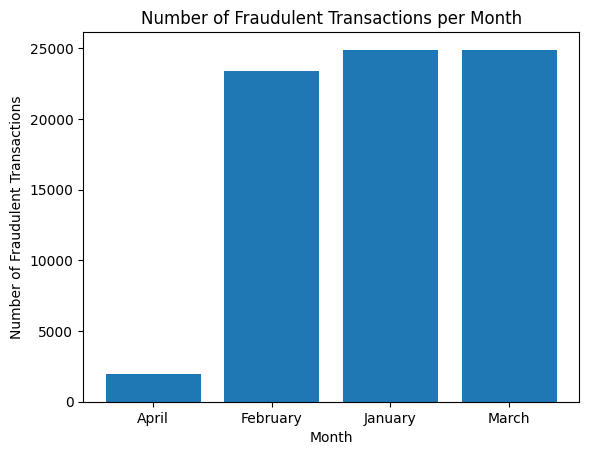

In [ ]:
# Plot number of Fraudulent Transactions per month

monthly_fraud_count = df_monthlyfraud.groupBy("Month").count().orderBy("Month", ascending=True)

month_counts = monthly_fraud_count.collect()
month_labels = [row["Month"] for row in month_counts]
month_values = [row["count"] for row in month_counts]

plt.bar(month_labels, month_values)
plt.xlabel("Month")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Number of Fraudulent Transactions per Month")
plt.show()
#

In [ ]:
df_monthlyfraud.groupBy("Month").count().show()

+--------+-----+
|   Month|count|
+--------+-----+
|February|23374|
| January|24848|
|   March|24896|
|   April| 1942|
+--------+-----+



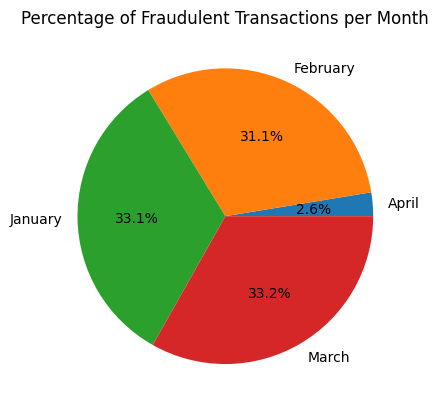

In [ ]:
plt.pie(month_values, labels=month_labels, autopct='%1.1f%%')
plt.title('Percentage of Fraudulent Transactions per Month')
plt.show()
#

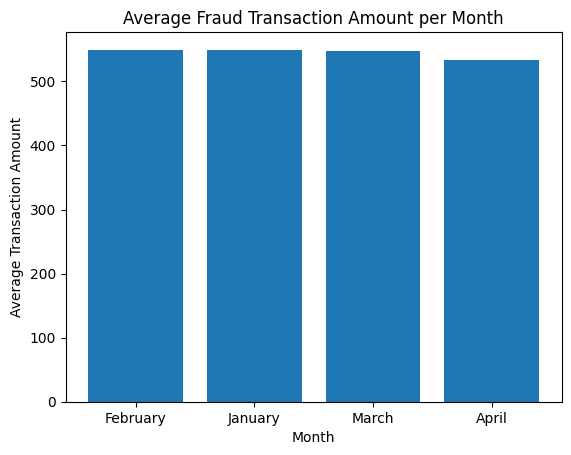

In [ ]:
monthly_fraude_average = df_monthlyfraud.groupBy("Month").agg({"Transaction_Amount": "avg"})

avg_counts = monthly_fraude_average.collect()
avg_labels = [row["Month"] for row in avg_counts]
avg_values = [row["avg(Transaction_Amount)"] for row in avg_counts]

plt.bar(avg_labels, avg_values)
plt.xlabel("Month")
plt.ylabel("Average Transaction Amount")
plt.title("Average Fraud Transaction Amount per Month")
plt.show()
#

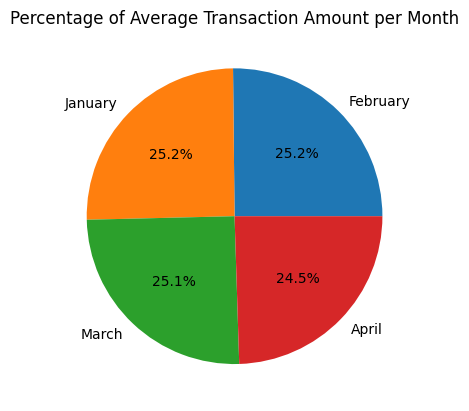

In [ ]:
plt.pie(avg_values, labels=avg_labels, autopct='%1.1f%%')
plt.title('Percentage of Average Transaction Amount per Month')
plt.show()

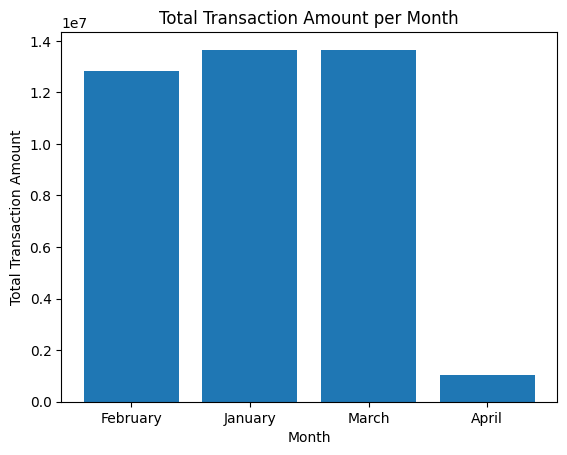

In [ ]:
monthy_fraud_amount = df_monthlyfraud.groupBy("Month").agg({"Transaction_Amount": "sum"})

amount_counts = monthy_fraud_amount.collect()
amount_labels = [row["Month"] for row in amount_counts]
amount_values = [row["sum(Transaction_Amount)"] for row in amount_counts]

plt.bar(amount_labels, amount_values)
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.title("Total Transaction Amount per Month")
plt.show()
#

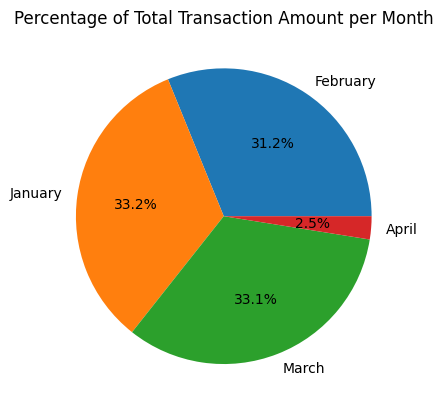

In [ ]:
plt.pie(amount_values, labels=amount_labels, autopct='%1.1f%%')
plt.title('Percentage of Total Transaction Amount per Month')
plt.show()

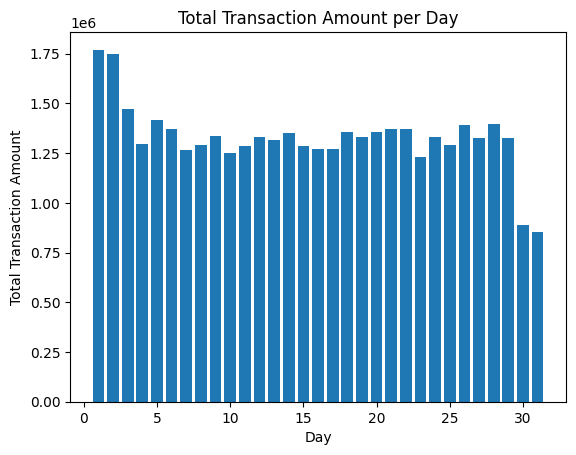

In [ ]:
daily_fraud = daily_fraud_count.groupBy("Day").agg({"Transaction_Amount": "sum"})

daily_count = daily_fraud.collect()
daily_labels = [row["Day"] for row in daily_count]
daily_values = [row["sum(Transaction_Amount)"] for row in daily_count]

plt.bar(daily_labels, daily_values)
plt.xlabel("Day")
plt.ylabel("Total Transaction Amount")
plt.title("Total Transaction Amount per Day")
plt.show()


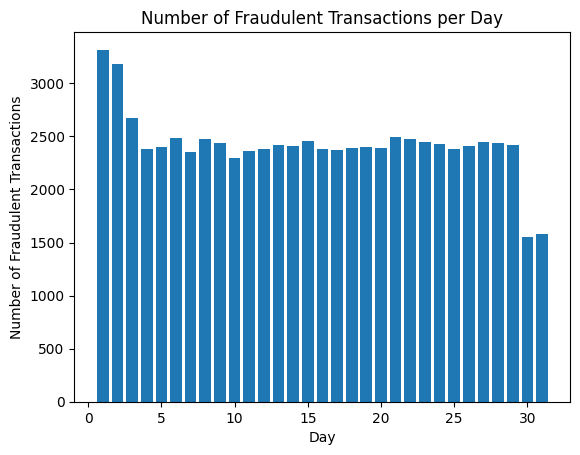

+---+-----+
|Day|count|
+---+-----+
|  1| 3317|
|  2| 3186|
|  3| 2674|
|  4| 2383|
|  5| 2400|
|  6| 2488|
|  7| 2354|
|  8| 2471|
|  9| 2439|
| 10| 2298|
| 11| 2367|
| 12| 2385|
| 13| 2419|
| 14| 2408|
| 15| 2460|
| 16| 2386|
| 17| 2370|
| 18| 2395|
| 19| 2400|
| 20| 2388|
+---+-----+
only showing top 20 rows



In [ ]:
daily_count = daily_fraud_count.groupBy("Day").count().orderBy("Day", ascending=True)

day_counts = daily_count.collect()
day_labels = [row["Day"] for row in day_counts]
day_values = [row["count"] for row in day_counts]

plt.bar(day_labels, day_values)
plt.xlabel("Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Number of Fraudulent Transactions per Day")
plt.show()

daily_count.show()


Text(0.5, 1.0, 'Average Fraud Transaction Amount per Day')

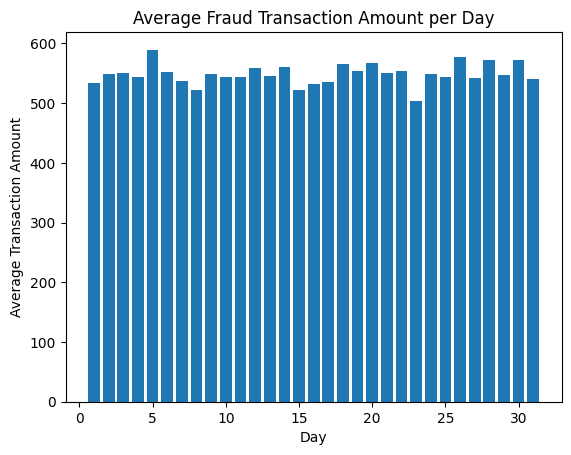

In [ ]:
daily_average = daily_fraud_count.groupBy("Day").agg({"Transaction_Amount": "avg"})

avg_counts = daily_average.collect()
avg_labels = [row["Day"] for row in avg_counts]
avg_values = [row["avg(Transaction_Amount)"] for row in avg_counts]

plt.bar(avg_labels, avg_values)
plt.xlabel("Day")
plt.ylabel("Average Transaction Amount")
plt.title("Average Fraud Transaction Amount per Day")

In [ ]:
daily_average.show()

+---+-----------------------+
|Day|avg(Transaction_Amount)|
+---+-----------------------+
| 31|      540.1946144121372|
| 28|      572.7068332650555|
| 26|      578.0277095435683|
| 27|       541.590097959184|
| 12|         558.6844360587|
| 22|      553.6644269572231|
|  1|      533.4521133554427|
| 13|      544.8767300537412|
|  6|      551.8222668810297|
| 16|      531.5087761944676|
|  3|      550.7838070306658|
| 20|       566.970297319933|
|  5|      589.3978416666658|
| 19|       553.736333333334|
| 15|      521.9122723577237|
| 17|      535.3279789029534|
|  9|      548.3713448134502|
|  4|      544.2014897188423|
|  8|      521.9031930392549|
| 23|       502.880445807771|
+---+-----------------------+
only showing top 20 rows



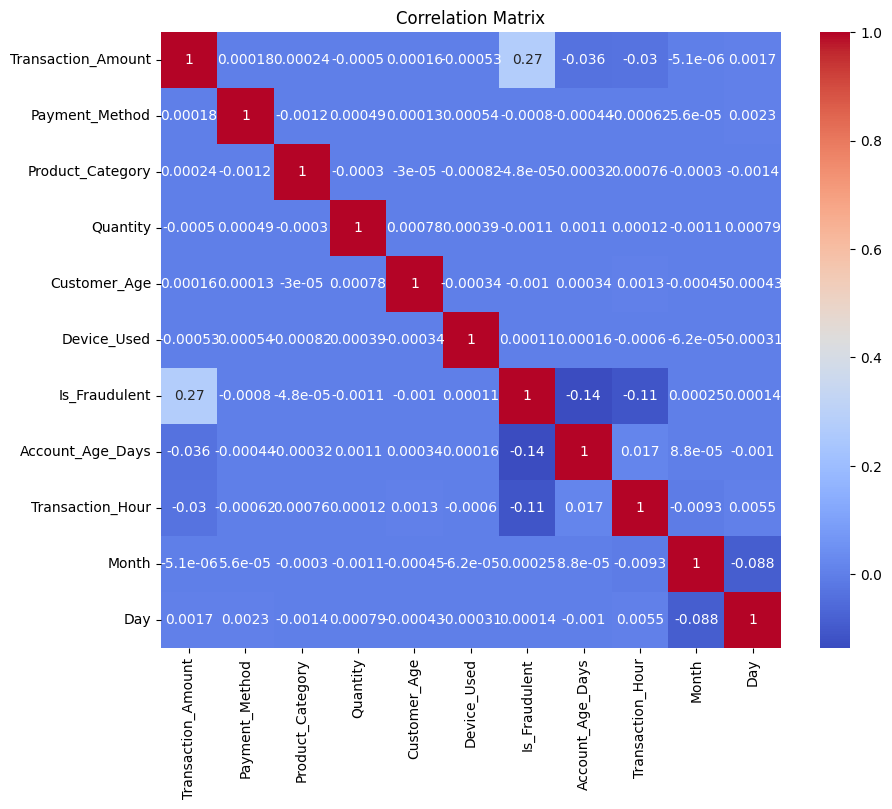

In [ ]:
# Plot Correlation matrix

vector_assembler = VectorAssembler(inputCols=df_fraud.columns, outputCol="features")
df_assembled = vector_assembler.transform(df_fraud)

correlation_matrix = Correlation.corr(df_assembled, "features").head()[0].toArray()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=df_fraud.columns, yticklabels=df_fraud.columns)
plt.title("Correlation Matrix")
plt.show()


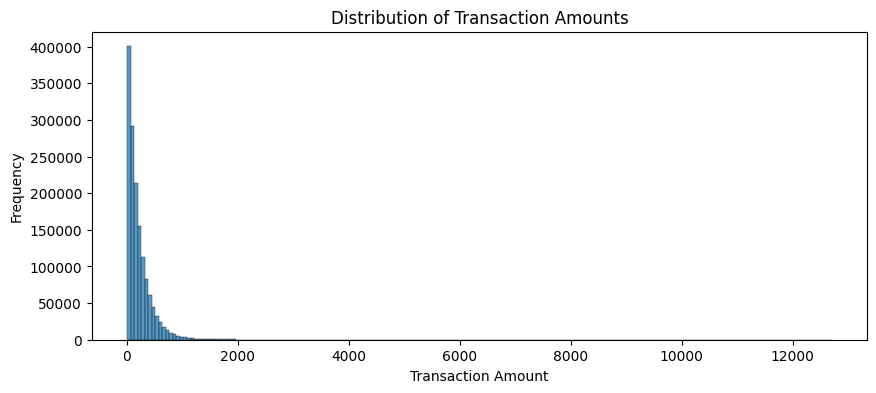

In [ ]:
# Plotting Transaction Amounts (Shows right skewness and a very large outlier)

# Collect the Transaction_Amount column as a list
transaction_amounts = cleaned_df.select("Transaction_Amount").rdd.flatMap(lambda x: x).collect()

# Convert to numpy array
transaction_amounts = np.array(transaction_amounts)

# Plotting
plt.figure(figsize=(10, 4))
sns.histplot(transaction_amounts, bins=200, kde=False)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

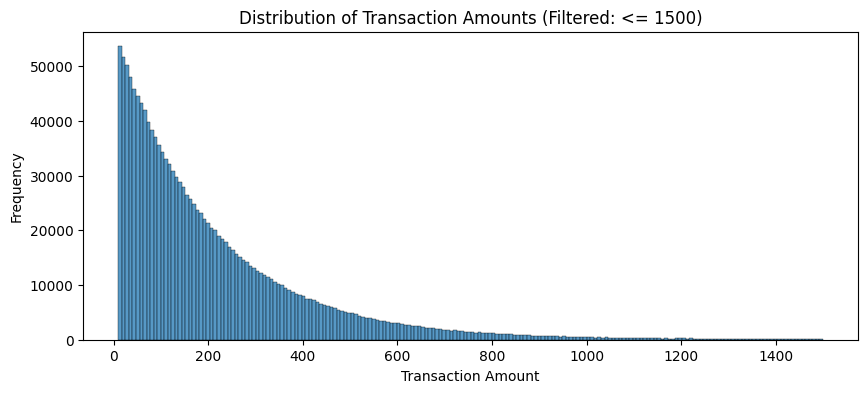

In [15]:
# Remove Outliers from Transaction Amounts

# Filter out values where Transaction_Amount > 1500
cleaned_df = cleaned_df.filter(col("Transaction_Amount") <= 1500)

# Collect the filtered Transaction_Amount column
transaction_amounts_filtered = cleaned_df.select("Transaction_Amount").rdd.flatMap(lambda x: x).collect()

# Convert to numpy array for easier handling (optional)
transaction_amounts_filtered = np.array(transaction_amounts_filtered)

# Plotting
plt.figure(figsize=(10, 4))
sns.histplot(transaction_amounts_filtered, bins=200, kde=False)
plt.title("Distribution of Transaction Amounts (Filtered: <= 1500)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

<ipython-input-85-d8c2277e045b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_labels, y=payment_values, edgecolor="black", linewidth=1, palette="Set2")


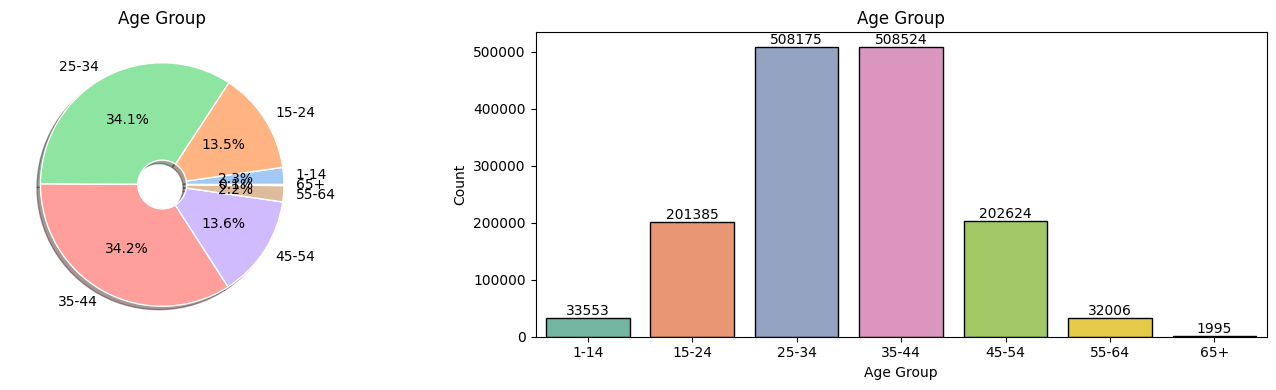

In [ ]:
# Plot Age Groups

# Step 1: Calculate the value counts for Age Groups
payment_counts_df = cleaned_df.groupBy("Age_Group").count().orderBy("Age_Group", ascending=True)

# Step 2: Collect the data into a Python list or dictionary for plotting
payment_counts = payment_counts_df.collect()
payment_labels = [row['Age_Group'] for row in payment_counts]
payment_values = [row['count'] for row in payment_counts]

# Plotting
plt.figure(figsize=(15, 4))

# Step 3: Pie chart
plt.subplot(1, 2, 1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(payment_values, labels=payment_labels, shadow=True, autopct='%1.1f%%',
        colors=colors, wedgeprops=dict(width=0.8, edgecolor="w"))
plt.title("Age Group")

# Step 4: Bar chart
plt.subplot(1, 2, 2)
ax = sns.barplot(x=payment_labels, y=payment_values, edgecolor="black", linewidth=1, palette="Set2")
ax.set_title("Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

<ipython-input-75-2cedf1f6268b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_labels, y=payment_values, edgecolor="black", linewidth=1, palette="Set2")


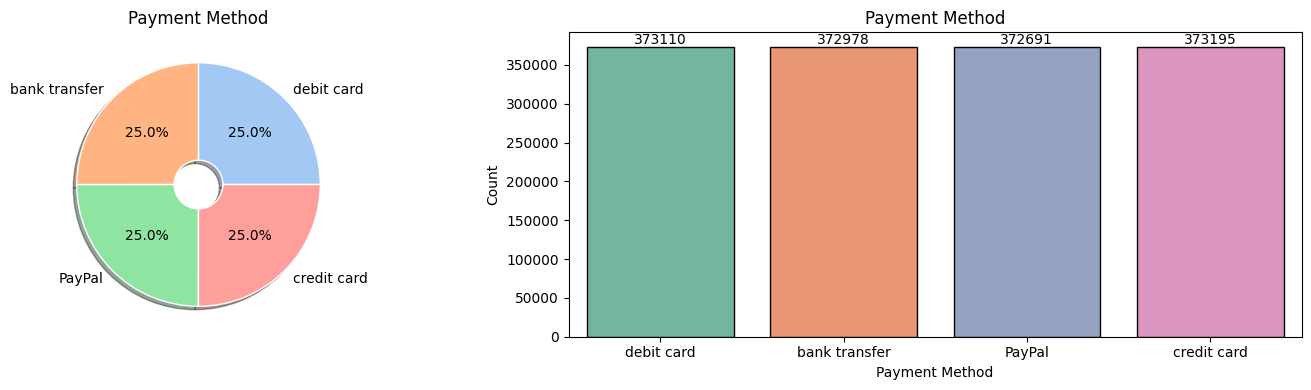

In [ ]:
# Plot Payment Method

# Step 1: Calculate the value counts for Payment Method
payment_counts_df = cleaned_df.groupBy("Payment_Method").count()

# Step 2: Collect the data into a Python list or dictionary for plotting
payment_counts = payment_counts_df.collect()
payment_labels = [row['Payment_Method'] for row in payment_counts]
payment_values = [row['count'] for row in payment_counts]

# Plotting
plt.figure(figsize=(15, 4))

# Step 3: Pie chart
plt.subplot(1, 2, 1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(payment_values, labels=payment_labels, shadow=True, autopct='%1.1f%%',
        colors=colors, wedgeprops=dict(width=0.8, edgecolor="w"))
plt.title("Payment Method")

# Step 4: Bar chart
plt.subplot(1, 2, 2)
ax = sns.barplot(x=payment_labels, y=payment_values, edgecolor="black", linewidth=1, palette="Set2")
ax.set_title("Payment Method")
ax.set_xlabel("Payment Method")
ax.set_ylabel("Count")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

<ipython-input-76-b0e5e77105e1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_labels, y=product_values, edgecolor="black", linewidth=1, palette="Set2")


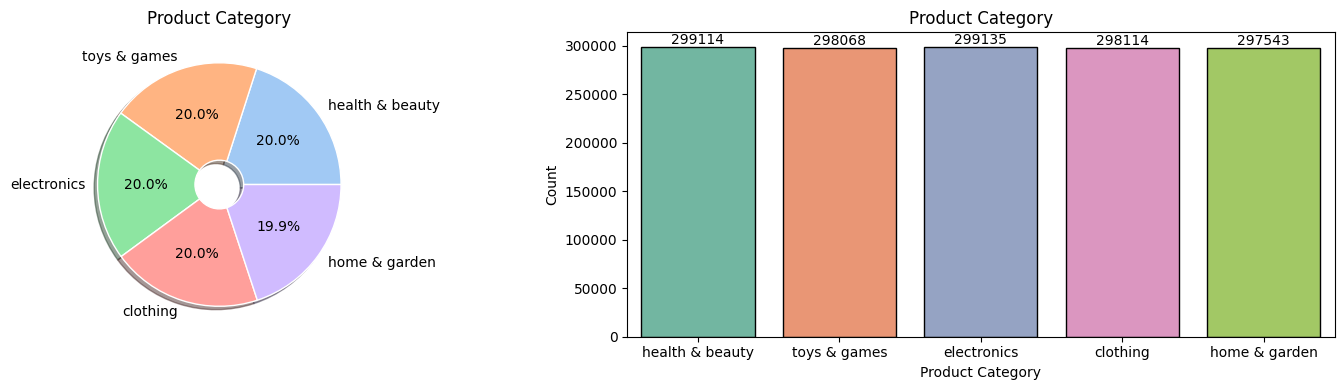

In [ ]:
# Plot Product Categories

# Step 1: Calculate the value counts for Product Category
product_counts_df = cleaned_df.groupBy("Product_Category").count()

# Step 2: Collect the data into a Python list or dictionary for plotting
product_counts = product_counts_df.collect()
product_labels = [row['Product_Category'] for row in product_counts]
product_values = [row['count'] for row in product_counts]

# Plotting
plt.figure(figsize=(15, 4))

# Step 3: Pie chart
plt.subplot(1, 2, 1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(product_values, labels=product_labels, shadow=True, autopct='%1.1f%%',
        colors=colors, wedgeprops=dict(width=0.8, edgecolor="w"))
plt.title("Product Category")

# Step 4: Bar chart
plt.subplot(1, 2, 2)
ax = sns.barplot(x=product_labels, y=product_values, edgecolor="black", linewidth=1, palette="Set2")
ax.set_title("Product Category")
ax.set_xlabel("Product Category")
ax.set_ylabel("Count")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

<ipython-input-86-53456a20947b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_labels, y=product_values, edgecolor="black", linewidth=1, palette="Set2")


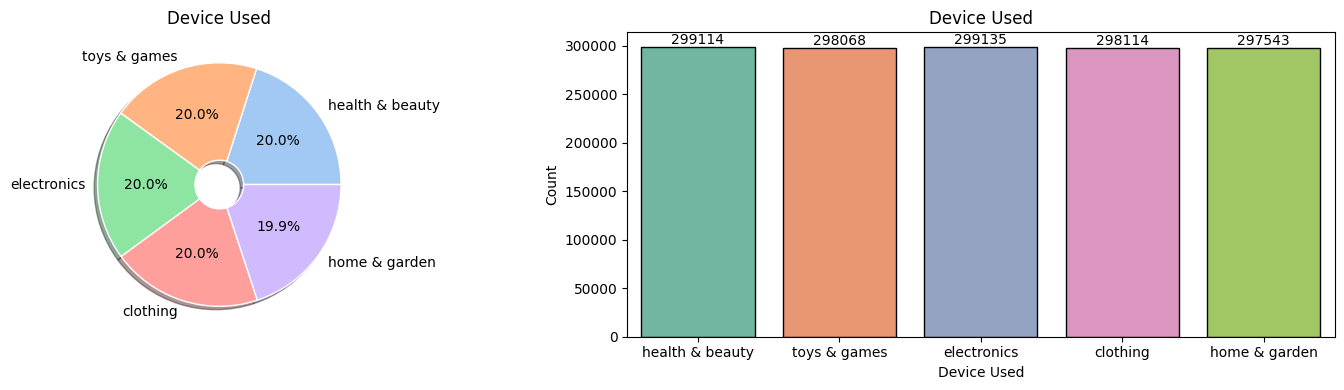

In [ ]:
# Plot Devices Used

# Step 1: Calculate the value counts for Product Category
device_counts_df = cleaned_df.groupBy("Device_Used").count()

# Step 2: Collect the data into a Python list or dictionary for plotting
device_counts = device_counts_df.collect()
device_labels = [row['Device_Used'] for row in device_counts]
device_values = [row['count'] for row in device_counts]

# Plotting
plt.figure(figsize=(15, 4))

# Step 3: Pie chart
plt.subplot(1, 2, 1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(product_values, labels=product_labels, shadow=True, autopct='%1.1f%%',
        colors=colors, wedgeprops=dict(width=0.8, edgecolor="w"))
plt.title("Device Used")

# Step 4: Bar chart
plt.subplot(1, 2, 2)
ax = sns.barplot(x=product_labels, y=product_values, edgecolor="black", linewidth=1, palette="Set2")
ax.set_title("Device Used")
ax.set_xlabel("Device Used")
ax.set_ylabel("Count")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

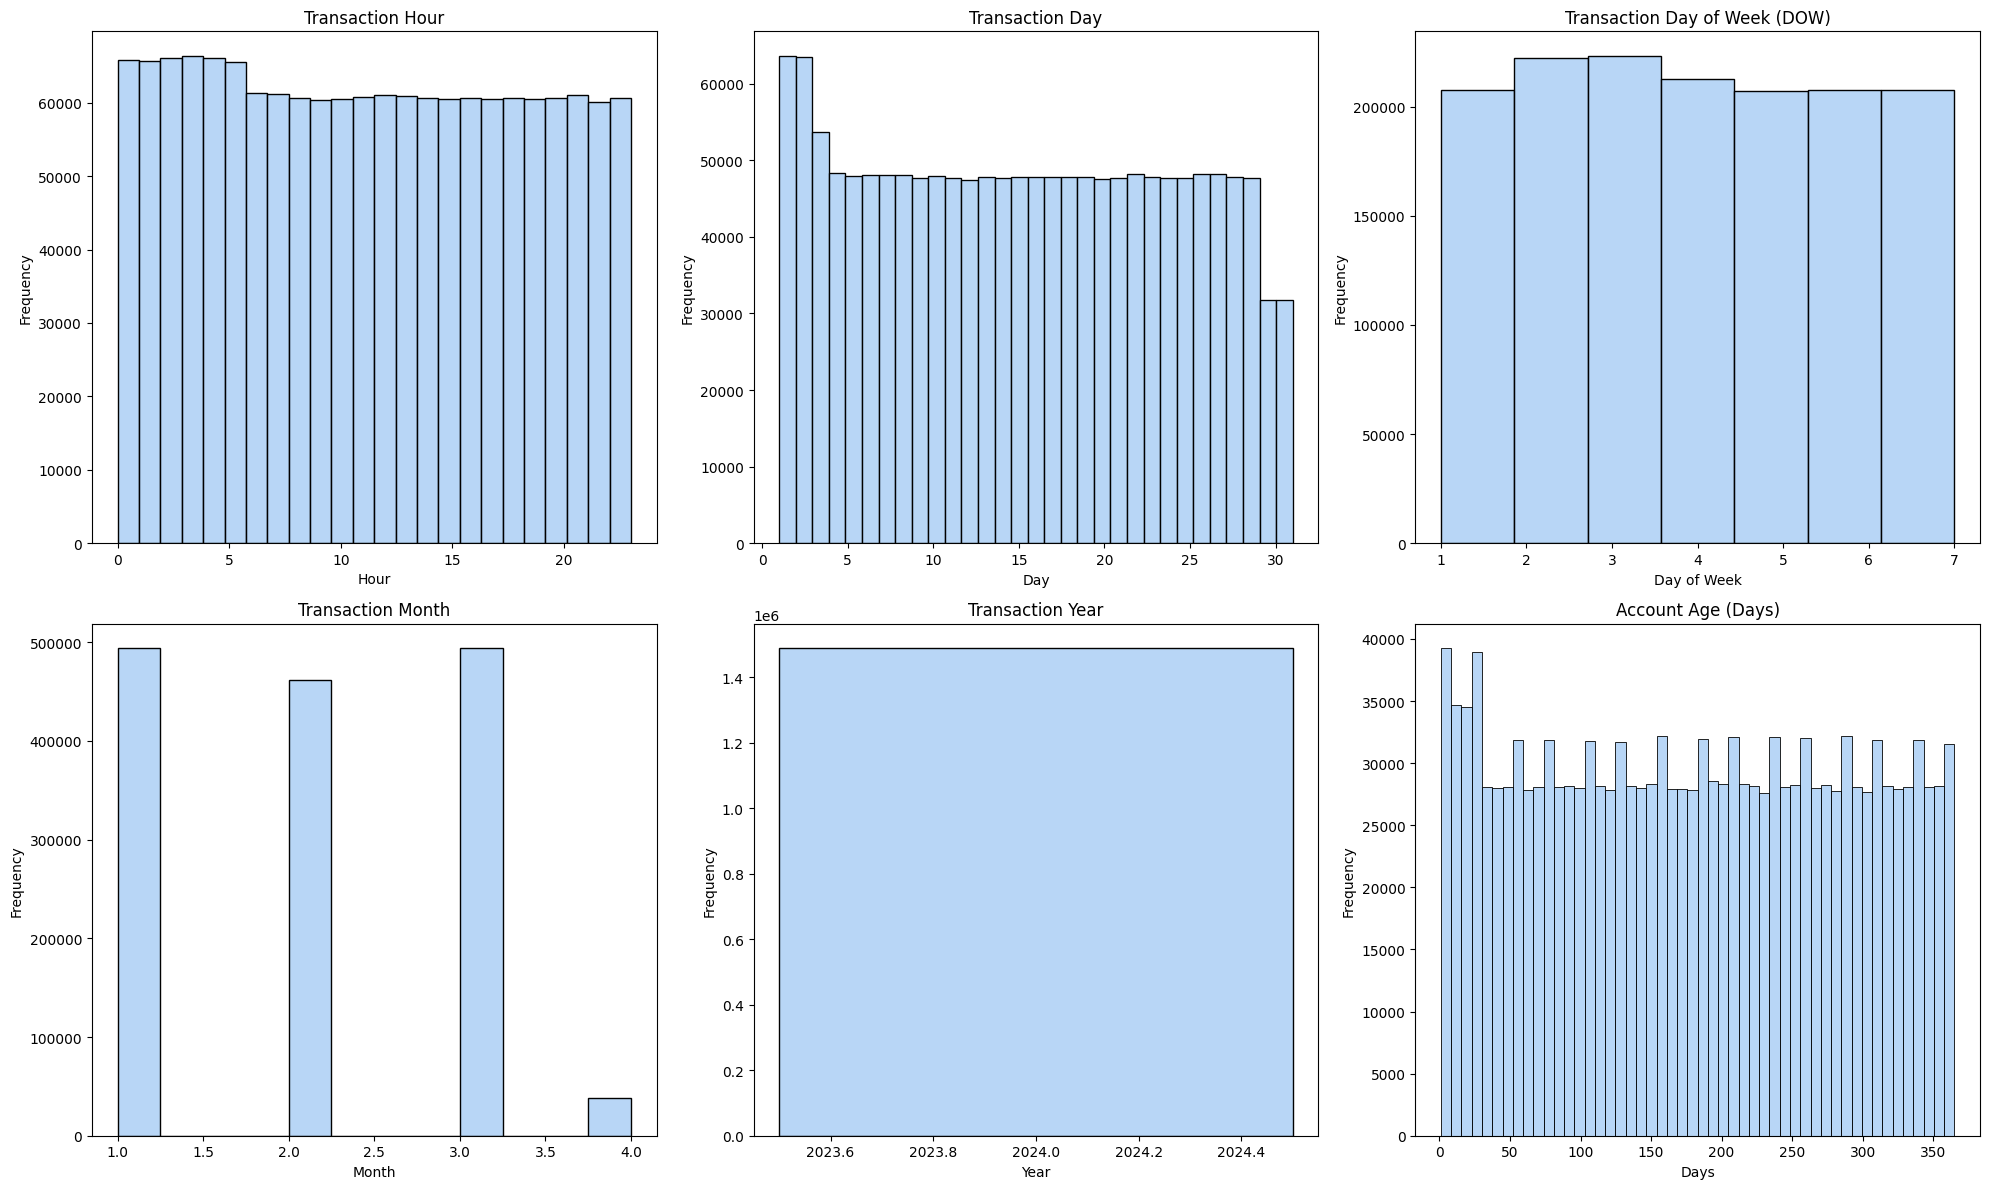

In [ ]:
# Plot histograms of Transaction Hour, Day, Day of Week, Month, Year, and Account Age Days

# Step 1: Collect the data for each relevant column
transaction_hour = cleaned_df.select("Transaction_Hour").rdd.flatMap(lambda x: x).collect()
transaction_day = cleaned_df.select("Transaction_Day").rdd.flatMap(lambda x: x).collect()
transaction_dow = cleaned_df.select("Transaction_DOW").rdd.flatMap(lambda x: x).collect()
transaction_month = cleaned_df.select("Transaction_Month").rdd.flatMap(lambda x: x).collect()
transaction_year = cleaned_df.select("Transaction_Year").rdd.flatMap(lambda x: x).collect()
account_age_days = cleaned_df.select("Account_Age_Days").rdd.flatMap(lambda x: x).collect()

# Step 2: Plot the histograms side by side
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.histplot(transaction_hour, bins=24, kde=False)
plt.title("Transaction Hour")
plt.xlabel("Hour")
plt.ylabel("Frequency")

plt.subplot(2, 3, 2)
sns.histplot(transaction_day, bins=31, kde=False)
plt.title("Transaction Day")
plt.xlabel("Day")
plt.ylabel("Frequency")

plt.subplot(2, 3, 3)
sns.histplot(transaction_dow, bins=7, kde=False)
plt.title("Transaction Day of Week (DOW)")
plt.xlabel("Day of Week")
plt.ylabel("Frequency")

plt.subplot(2, 3, 4)
sns.histplot(transaction_month, bins=12, kde=False)
plt.title("Transaction Month")
plt.xlabel("Month")
plt.ylabel("Frequency")

plt.subplot(2, 3, 5)
sns.histplot(transaction_year, bins=len(set(transaction_year)), kde=False)
plt.title("Transaction Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.subplot(2, 3, 6)
sns.histplot(account_age_days, bins=50, kde=False)
plt.title("Account Age (Days)")
plt.xlabel("Days")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

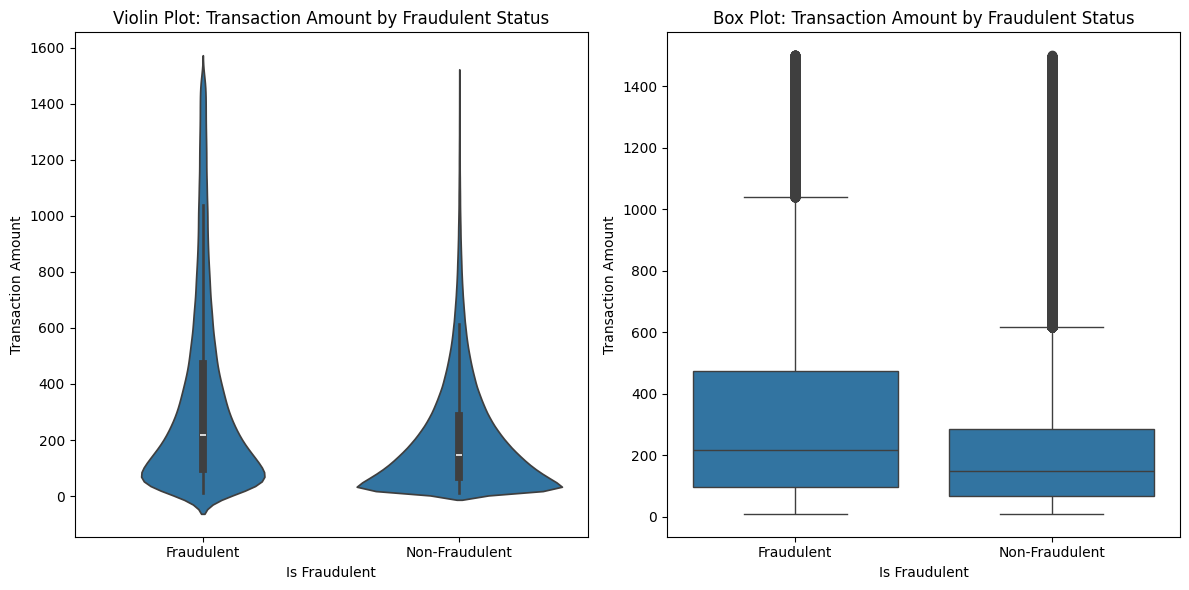

In [ ]:
# Plot a violin plot and box plot of Fraudulent Status vs Transaction Amount

# Collect the data into a list of tuples
data = cleaned_df.select("Is_Fraudulent", "Transaction_Amount").rdd.map(lambda row: (row["Is_Fraudulent"], row["Transaction_Amount"])).collect()

# Separate the data based on the 'Is_Fraudulent' label
fraudulent_data = [amount for label, amount in data if label == 1]
non_fraudulent_data = [amount for label, amount in data if label == 0]

# Prepare the data
plot_data = {
    'Is_Fraudulent': ['Fraudulent'] * len(fraudulent_data) + ['Non-Fraudulent'] * len(non_fraudulent_data),
    'Transaction_Amount': fraudulent_data + non_fraudulent_data
}

# Plot the violin plot and box plot side by side
plt.figure(figsize=(12, 6))

# Plot the violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x=plot_data['Is_Fraudulent'], y=plot_data['Transaction_Amount'])
plt.title("Violin Plot: Transaction Amount by Fraudulent Status")
plt.xlabel("Is Fraudulent")
plt.ylabel("Transaction Amount")

# Plot the box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=plot_data['Is_Fraudulent'], y=plot_data['Transaction_Amount'])
plt.title("Box Plot: Transaction Amount by Fraudulent Status")
plt.xlabel("Is Fraudulent")
plt.ylabel("Transaction Amount")

plt.tight_layout()
plt.show()

##Model Building and Testing

In [16]:
# Split the DataFrame into 63% Train, 30% Test, and 7% Validation using a random seed

# Split the DataFrame into 70% Train and 30% Test
train_df, test_df = cleaned_df.randomSplit([0.7, 0.3], seed=42)

# Further split the training set into 90% Training and 10% Validation
train_df, val_df = train_df.randomSplit([0.9, 0.1], seed=42)

# Extract features and target for training, validation, and testing sets
train_features_df = train_df.drop("Is_Fraudulent")
train_target_df = train_df.select("Is_Fraudulent")

val_features_df = val_df.drop("Is_Fraudulent")
val_target_df = val_df.select("Is_Fraudulent")

test_features_df = test_df.drop("Is_Fraudulent")
test_target_df = test_df.select("Is_Fraudulent")

# Check the count of each split
print(f"Training Features Count: {train_features_df.count()}")
print(f"Training Target Count: {train_target_df.count()}")
print(f"Validation Features Count: {val_features_df.count()}")
print(f"Validation Target Count: {val_target_df.count()}")
print(f"Testing Features Count: {test_features_df.count()}")
print(f"Testing Target Count: {test_target_df.count()}")

Training Features Count: 938387
Training Target Count: 938387
Validation Features Count: 103976
Validation Target Count: 103976
Testing Features Count: 445899
Testing Target Count: 445899


In [17]:
#Create categorical and numeric columns

# Specify columns to always include as categorical
additional_categorical_columns = {"Does_Address_Match"}

# Identify categorical and numeric columns
def identify_columns(df):
    categorical_cols = []
    numeric_cols = []

    for field in df.schema.fields:
        col_name = field.name
        # Exclude 'Is_Fraudulent' from categorical and numeric columns
        if col_name == "Is_Fraudulent":
            continue

        if col_name in additional_categorical_columns:
            categorical_cols.append(col_name)
        elif isinstance(field.dataType, StringType):
            categorical_cols.append(col_name)
        elif isinstance(field.dataType, (IntegerType, DoubleType, FloatType)):
            numeric_cols.append(col_name)

    return categorical_cols, numeric_cols

# Identify the columns
categorical_columns, numeric_columns = identify_columns(cleaned_df)

print("Categorical Columns:", categorical_columns)
print("Numeric Columns:", numeric_columns)

Categorical Columns: ['Payment_Method', 'Product_Category', 'Device_Used', 'Age_Group', 'Does_Address_Match']
Numeric Columns: ['Transaction_Amount', 'Quantity', 'Account_Age_Days', 'Transaction_Hour', 'Transaction_Day', 'Transaction_DOW', 'Transaction_Month', 'Transaction_Year']


In [18]:
# Define the pipeline

# Define the label column
label_column = "Is_Fraudulent"

# Define stages for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns if col != label_column]
encoders = [OneHotEncoder(inputCols=[f"{col}_index"], outputCols=[f"{col}_onehot"]) for col in categorical_columns if col != label_column]

# Define stages for numeric columns
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="numeric_features")
scaler = MinMaxScaler(inputCol="numeric_features", outputCol="scaled_numeric_features")

# Combine all features into a single vector
final_assembler = VectorAssembler(
    inputCols=[f"{col}_onehot" for col in categorical_columns if col != label_column] + ["scaled_numeric_features"],
    outputCol="features"
)

# Define the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, final_assembler])

# Fit and transform the pipeline on training data
pipeline_model = pipeline.fit(train_df)

# Transform the training, validation, and test data
train_preprocessed_df = pipeline_model.transform(train_df)
val_preprocessed_df = pipeline_model.transform(val_df)
test_preprocessed_df = pipeline_model.transform(test_df)

# Check the resulting DataFrames
print(f"Training Data Count: {train_preprocessed_df.count()}")
print(f"Validation Data Count: {val_preprocessed_df.count()}")
print(f"Testing Data Count: {test_preprocessed_df.count()}")

Training Data Count: 938387
Validation Data Count: 103976
Testing Data Count: 445899


In [23]:
# Extract features and labels for training, validation and testing sets
train_final_df = train_preprocessed_df.select("features", "Is_Fraudulent")
val_final_df = val_preprocessed_df.select("features", "Is_Fraudulent")
test_final_df = test_preprocessed_df.select("features", "Is_Fraudulent")

# Check the count of each split
print(f"Training Features Count: {train_final_df.count()}")
print(f"Validation Features Count: {val_final_df.count()}")
print(f"Testing Features Count: {test_final_df.count()}")

Training Features Count: 938387
Validation Features Count: 103976
Testing Features Count: 445899


##Logistic Regression Model

In [24]:
# Fit model, evaluate metrics

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col

# Initialize the Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="Is_Fraudulent", maxIter=10)

# Train the model on the training data
lr_model = lr.fit(train_final_df)

# Make predictions on the validation set
val_predictions = lr_model.transform(val_final_df)

# Make predictions on the test set
test_predictions = lr_model.transform(test_final_df)

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Is_Fraudulent", metricName="areaUnderROC")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is_Fraudulent", predictionCol="prediction", metricName="accuracy")

# Evaluate the model on the validation set
val_auc = evaluator.evaluate(val_predictions)
val_accuracy = accuracy_evaluator.evaluate(val_predictions)
print(f"Validation AUC: {val_auc}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test set
test_auc = evaluator.evaluate(test_predictions)
test_accuracy = accuracy_evaluator.evaluate(test_predictions)
print(f"Test AUC: {test_auc}")
print(f"Test Accuracy: {test_accuracy}")

Validation AUC: 0.7413898678121682
Validation Accuracy: 0.955441640378549
Test AUC: 0.7459963584422704
Test Accuracy: 0.955247713047125


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


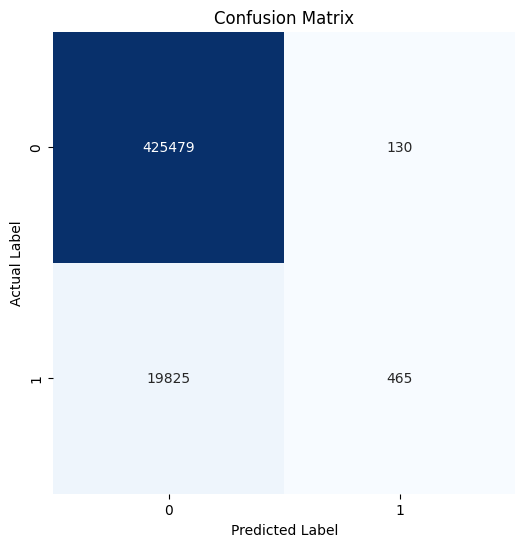

In [25]:
# Plot confusion matrix for test dataset

from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the label column is of type Double
test_predictions = test_predictions.withColumn("Is_Fraudulent", col("Is_Fraudulent").cast("double"))

prediction_and_labels = test_predictions.select("prediction", "Is_Fraudulent").rdd.map(lambda row: (float(row['prediction']), float(row['Is_Fraudulent'])))

from pyspark.mllib.evaluation import MulticlassMetrics

# Initialize MulticlassMetrics
metrics = MulticlassMetrics(prediction_and_labels)

# Confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=False, square=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Print classification report for Testing Dataset

labels = sorted(test_predictions.select("Is_Fraudulent").distinct().rdd.flatMap(lambda x: x).collect())

# Initialize variables for weighted average calculations
total_instances = 0
weighted_precision = 0.0
weighted_recall = 0.0
weighted_f1 = 0.0

print("Classification Report:")

for label in labels:
    precision = metrics.precision(label)
    recall = metrics.recall(label)
    f1_score = metrics.fMeasure(label)
    support = confusion_matrix[int(label), :].sum()  # Support is the sum of the row corresponding to the label in the confusion matrix

    # Accumulate weighted metrics
    weighted_precision += precision * support
    weighted_recall += recall * support
    weighted_f1 += f1_score * support
    total_instances += support

    print(f"Class {int(label)}:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall:    {recall:.2f}")
    print(f"  F1 Score:  {f1_score:.2f}")
    print(f"  Support:   {support}")
    print()

# Calculate weighted averages
weighted_precision /= total_instances
weighted_recall /= total_instances
weighted_f1 /= total_instances

# Print overall weighted metrics
print(f"Overall Weighted Precision: {weighted_precision:.2f}")
print(f"Overall Weighted Recall:    {weighted_recall:.2f}")
print(f"Overall Weighted F1 Score:  {weighted_f1:.2f}")


Classification Report:
Class 0:
  Precision: 0.96
  Recall:    1.00
  F1 Score:  0.98
  Support:   425609.0

Class 1:
  Precision: 0.78
  Recall:    0.02
  F1 Score:  0.04
  Support:   20290.0

Overall Weighted Precision: 0.95
Overall Weighted Recall:    0.96
Overall Weighted F1 Score:  0.93


##Logistic Regression Using Hyperparameters

In [27]:
# Compute class weights, initialize model with hyperparameters using cross validation

from sklearn.utils.class_weight import compute_class_weight
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import when, col

# Gather labels from the entire dataset, not just training
all_labels = train_final_df.union(val_final_df).union(test_final_df).select('Is_Fraudulent').rdd.flatMap(lambda x: x).collect()

class_weights = compute_class_weight('balanced', classes=np.unique(all_labels), y=all_labels)
class_weights_dict = dict(enumerate(class_weights))

# Create a DataFrame with the class weights as a column
train_final_df = train_final_df.withColumn(
    "class_weight",
    when(col("Is_Fraudulent") == 0, class_weights_dict.get(0, 1.0))
    .otherwise(class_weights_dict.get(1, 1.0))
)

val_final_df = val_final_df.withColumn(
    "class_weight",
    when(col("Is_Fraudulent") == 0, class_weights_dict.get(0, 1.0))
    .otherwise(class_weights_dict.get(1, 1.0))
)

test_final_df = test_final_df.withColumn(
    "class_weight",
    when(col("Is_Fraudulent") == 0, class_weights_dict.get(0, 1.0))
    .otherwise(class_weights_dict.get(1, 1.0))
)

# Initialize the Logistic Regression model with weightCol
lr = LogisticRegression(featuresCol="features", labelCol="Is_Fraudulent", weightCol="class_weight", maxIter=10)

# Create a parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Initialize CrossValidator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol="Is_Fraudulent", metricName="areaUnderROC"),
                          numFolds=5)

# Run cross-validation to tune hyperparameters
cv_model = crossval.fit(train_final_df)

# Use the best model to predict on the test set
cv_predictions = cv_model.transform(test_final_df)

# Evaluate the tuned model
evaluator = BinaryClassificationEvaluator(labelCol="Is_Fraudulent", metricName="areaUnderROC")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is_Fraudulent", predictionCol="prediction", metricName="accuracy")

# Evaluate the model on the test set
cv_auc = evaluator.evaluate(cv_predictions)
cv_accuracy = accuracy_evaluator.evaluate(cv_predictions)
print(f"Tuned Test AUC: {cv_auc}")
print(f"Tuned Test Accuracy: {cv_accuracy}")


Tuned Test AUC: 0.7462131273485607
Tuned Test Accuracy: 0.6882590003565829


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


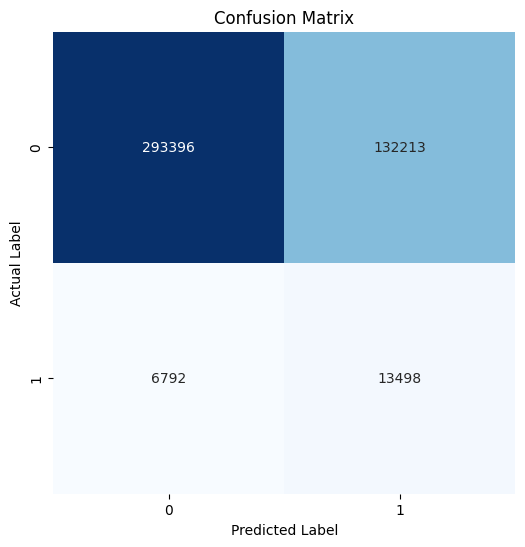

In [28]:
# Plot confusion matrix

from pyspark.sql.functions import col

# Extract predictions and labels
predictions_and_labels = cv_predictions.select("prediction", "Is_Fraudulent").rdd.map(lambda row: (float(row['prediction']), float(row['Is_Fraudulent'])))

from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize MulticlassMetrics
metrics = MulticlassMetrics(predictions_and_labels)

# Get the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=False, square=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Print Classification Report

from pyspark.mllib.evaluation import MulticlassMetrics

# Extract predictions and labels
predictions_and_labels = cv_predictions.select("prediction", "Is_Fraudulent").rdd.map(lambda row: (float(row['prediction']), float(row['Is_Fraudulent'])))

# Initialize MulticlassMetrics
metrics = MulticlassMetrics(predictions_and_labels)

# Get the distinct labels
labels = sorted(cv_predictions.select("Is_Fraudulent").distinct().rdd.flatMap(lambda x: x).collect())

# Initialize variables for weighted average calculations
total_instances = 0
weighted_precision = 0.0
weighted_recall = 0.0
weighted_f1 = 0.0

print("Classification Report:")

# Compute metrics for each class
for label in labels:
    precision = metrics.precision(float(label))
    recall = metrics.recall(float(label))
    f1_score = metrics.fMeasure(float(label))  # Ensure label is passed as float
    support = int(confusion_matrix[int(label), :].sum())  # Support is the sum of the row corresponding to the label in the confusion matrix

    # Accumulate weighted metrics
    weighted_precision += precision * support
    weighted_recall += recall * support
    weighted_f1 += f1_score * support
    total_instances += support

    print(f"Class {int(label)}:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall:    {recall:.2f}")
    print(f"  F1 Score:  {f1_score:.2f}")
    print(f"  Support:   {support}")
    print()

# Calculate weighted averages
weighted_precision /= total_instances
weighted_recall /= total_instances
weighted_f1 /= total_instances

# Print overall weighted metrics
print(f"Overall Weighted Precision: {weighted_precision:.2f}")
print(f"Overall Weighted Recall:    {weighted_recall:.2f}")
print(f"Overall Weighted F1 Score:  {weighted_f1:.2f}")


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Classification Report:
Class 0:
  Precision: 0.98
  Recall:    0.69
  F1 Score:  0.81
  Support:   425609

Class 1:
  Precision: 0.09
  Recall:    0.67
  F1 Score:  0.16
  Support:   20290

Overall Weighted Precision: 0.94
Overall Weighted Recall:    0.69
Overall Weighted F1 Score:  0.78


In [33]:
# Categorical Columns with their unique values (you would replace these lists with the actual unique values in your dataset)
payment_methods = ['credit card', 'debit card', 'PayPal', 'bank transfer']
#product_categories = ['toys & games', 'clothing', 'health & beauty', 'home & garden', 'Electronics']
devices_used = ['mobile', 'desktop', 'tablet']
age_groups = ['1-14', '15-24', '25-34', '35-44', '45-54', '55-64','65+']
address_match = ['Yes', 'No']

# Numeric Columns
numeric_columns = ['Quantity', 'Account_Age_Days', 'Transaction_Hour', 'Transaction_Day', 'Transaction_DOW', 'Transaction_Month', 'Transaction_Year', 'scaled_numeric_features']

# Create the feature names for one-hot encoded categorical variables
categorical_feature_names = (
    [f"Payment_Method_{val}" for val in payment_methods] +
    #[f"Product_Category_{val}" for val in product_categories] +
    [f"Device_Used_{val}" for val in devices_used] +
    [f"Age_Group_{val}" for val in age_groups] +
    [f"Does_Address_Match_{val}" for val in address_match]
)

# Combine with numeric columns
feature_names = categorical_feature_names + numeric_columns


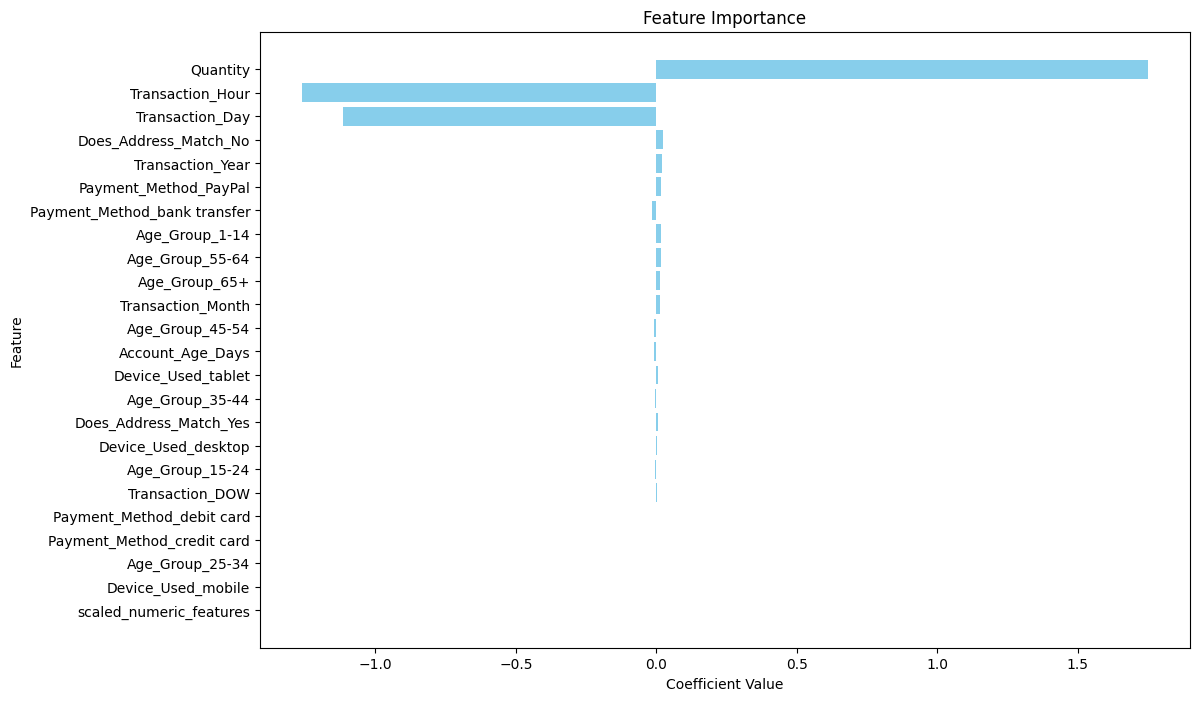

In [34]:
# Retrieve the best model from the cross-validator
best_model = cv_model.bestModel

# Extract the coefficients from the best logistic regression model
coefficients = best_model.coefficients.toArray()

# Now we can proceed with creating the DataFrame and plotting
import pandas as pd
import matplotlib.pyplot as plt

# Combine with numeric columns
feature_names = categorical_feature_names + numeric_columns

# Create a DataFrame for easy visualization
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Calculate the absolute value of coefficients for sorting
coef_df['Importance'] = coef_df['Coefficient'].abs()

# Sort by importance
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Most important features at the top
plt.show()


##Gated Recurrent Unit (GRU) Model

In [ ]:
# Create function to convert PySpark DF to Tensor Flow Dataset to be able to run the Recurrent Neural Network (RNN), then define the Gated Recurrent Unit (GRU) and train the model

# Convert PySpark DataFrame to TensorFlow Dataset
def convert_to_tensorflow_dataset(df):
    def to_tensor(row):
        features = row['features'].toArray()
        label = float(row['Is_Fraudulent'])
        return features, label

    def generator():
        for row in df.toLocalIterator():
            features, label = to_tensor(row)
            yield features, label

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(len(df.select("features").first()[0].toArray()),), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.float32)
        )
    )

    dataset = dataset.shuffle(buffer_size=512).batch(16).prefetch(tf.data.AUTOTUNE)

    return dataset

# Convert DataFrames to TensorFlow datasets
train_dataset = convert_to_tensorflow_dataset(train_final_df)
val_dataset = convert_to_tensorflow_dataset(val_final_df)
test_dataset = convert_to_tensorflow_dataset(test_final_df)

# Define the GRU model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_final_df.select("features").first()[0].toArray()),)),
    tf.keras.layers.Reshape((1, -1)),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

# Save the model and training history
model.save('gru_fd_model.h5')
with open('gru_training_history_fd.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/10
  58650/Unknown 337s 5ms/step - accuracy: 0.9642 - loss: 0.1481

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58650/58650 ━━━━━━━━━━━━━━━━━━━━ 377s 6ms/step - accuracy: 0.9642 - loss: 0.1481 - val_accuracy: 0.9517 - val_loss: 0.1774
Epoch 2/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 377s 6ms/step - accuracy: 0.9650 - loss: 0.1352 - val_accuracy: 0.9530 - val_loss: 0.1704
Epoch 3/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 373s 6ms/step - accuracy: 0.9650 - loss: 0.1343 - val_accuracy: 0.9532 - val_loss: 0.1680
Epoch 4/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 374s 6ms/step - accuracy: 0.9651 - loss: 0.1343 - val_accuracy: 0.9518 - val_loss: 0.1709
Epoch 5/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 375s 6ms/step - accuracy: 0.9650 - loss: 0.1342 - val_accuracy: 0.9524 - val_loss: 0.1705
Epoch 6/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 379s 6ms/step - accuracy: 0.9650 - loss: 0.1339 - val_accuracy: 0.9536 - val_loss: 0.1697
Epoch 7/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 378s 6ms/step - accuracy: 0.9650 - loss: 0.1343 - val_accuracy: 0.9536 - val_loss: 0.1716
Epoch 8/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 375s 6ms/step - accuracy: 0.9

In [ ]:
# Load the model (So it doesnt have to be re-run each time)

from tensorflow.keras.models import load_model
model_path = 'gru_fd_model.h5'
loaded_model = load_model(model_path)

In [ ]:
# Load the model (so the code above doesnt have to be run each time)

import pickle

# Specify the path to the pickle file
pickle_file_path = 'gru_training_history_fd.pkl'


# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']

# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.9548661708831787, 0.9549610018730164, 0.9549269080162048, 0.9549279808998108, 0.9548597931861877, 0.9548054337501526, 0.9547010064125061, 0.9547191262245178, 0.9546945691108704, 0.9546061754226685]
[0.9517484903335571, 0.9529987573623657, 0.9531622529029846, 0.951758086681366, 0.9523832201957703, 0.9536046981811523, 0.9536046981811523, 0.9516138434410095, 0.9533931016921997, 0.9516811370849609]
[0.16443726420402527, 0.15861572325229645, 0.15787489712238312, 0.1577303111553192, 0.15770845115184784, 0.15749052166938782, 0.1577230542898178, 0.1577397882938385, 0.1574571281671524, 0.15782752633094788]
[0.17739927768707275, 0.17040251195430756, 0.16799549758434296, 0.17087073624134064, 0.1705228090286255, 0.16968731582164764, 0.17156578600406647, 0.17082662880420685, 0.17438820004463196, 0.1720624566078186]


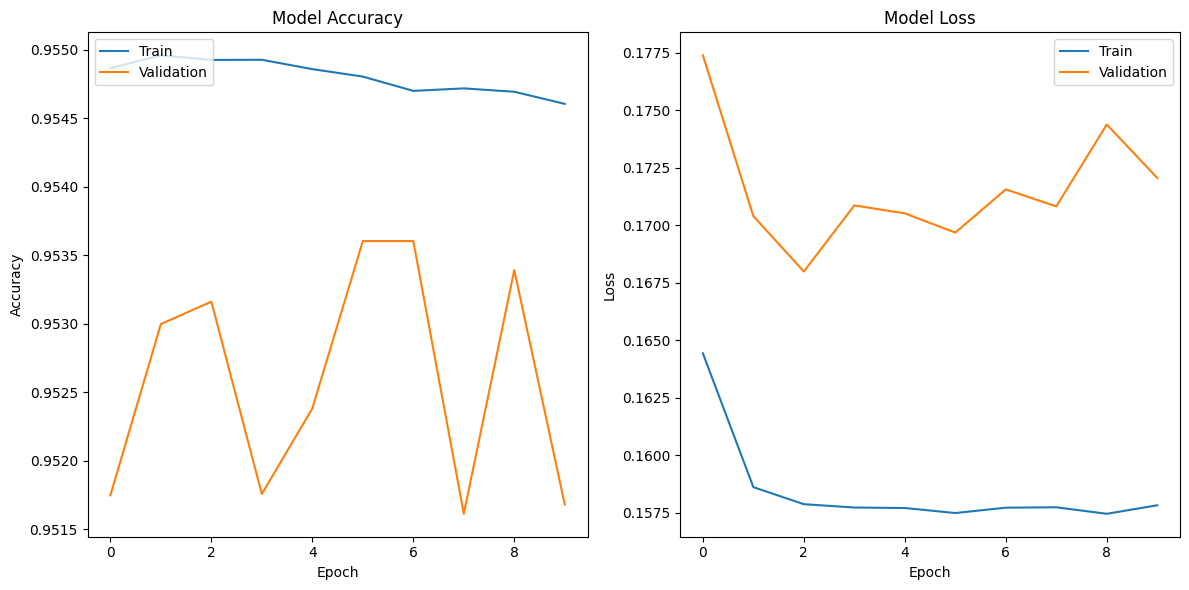

In [ ]:
# Plot Model Accuracy and Model Loss for Train and Validation

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

27869/27869 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step
27869/27869 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.9612 - loss: 0.1489
Test Loss: 0.17132006585597992
Test Accuracy: 0.9514329433441162
                precision    recall  f1-score   support

Not Fraudulent       0.95      0.99      0.97    425609
    Fraudulent       0.06      0.01      0.02     20290

      accuracy                           0.94    445899
     macro avg       0.51      0.50      0.50    445899
  weighted avg       0.91      0.94      0.93    445899

Accuracy of the Model: 94.4%


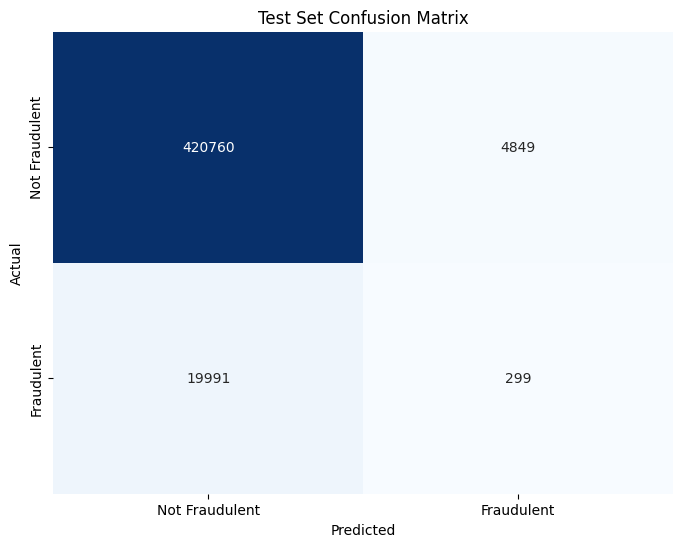

In [ ]:
# Determine the predicted classes for the test dataset, get true labels, load the model history, plot classification report and confusion matrix

import numpy as np
import pickle
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
loaded_model = tf.keras.models.load_model('gru_fd_model.h5')

# Predict probabilities for the test data
y_pred_prob = loaded_model.predict(test_dataset)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Extract true labels from the test dataset
y_true = []
for _, label in test_dataset:
    y_true.extend(label.numpy())
y_true = np.array(y_true)

# Load the model training history
with open("gru_training_history_fd.pkl", "rb") as file:
    history = pickle.load(file)

# Evaluate the model on test data
test_loss, test_accuracy = loaded_model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print classification report
print(classification_report(y_true, y_pred, target_names=["Not Fraudulent", "Fraudulent"]))

# Print accuracy
print("Accuracy of the Model: {:.1f}%".format(accuracy_score(y_true, y_pred) * 100))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=["Not Fraudulent", "Fraudulent"], yticklabels=["Not Fraudulent", "Fraudulent"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Set Confusion Matrix")
plt.show()

6499/6499 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6499/6499 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9620 - loss: 0.1483
Validation Loss: 0.17206236720085144
Validation Accuracy: 0.9516811370849609
                precision    recall  f1-score   support

Not Fraudulent       0.96      0.99      0.97     99277
    Fraudulent       0.07      0.02      0.03      4699

      accuracy                           0.95    103976
     macro avg       0.51      0.50      0.50    103976
  weighted avg       0.91      0.95      0.93    103976

Accuracy of the Model on Validation Set: 94.5%


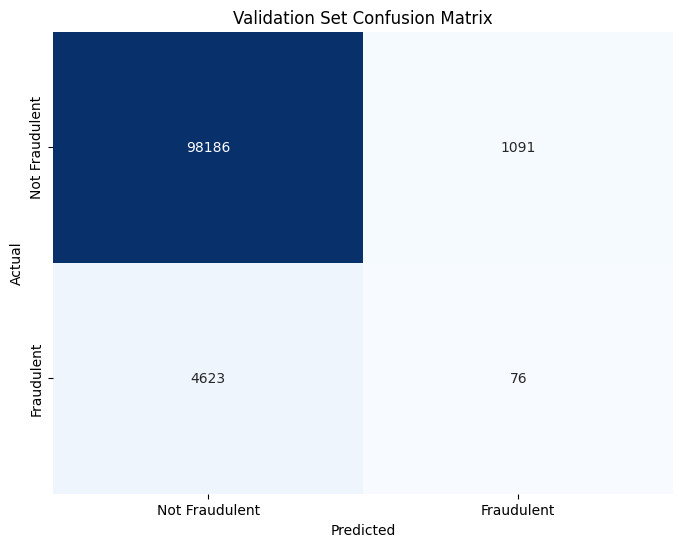

In [ ]:
# Determine the predicted classes for the validation dataset, get true labels, load the model history, plot classification report and confusion matrix

# Load the trained model
loaded_model = tf.keras.models.load_model('gru_fd_model.h5')

# Predict probabilities for the validation data
y_val_pred_prob = loaded_model.predict(val_dataset)
y_val_pred = (y_val_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Extract true labels from the validation dataset
y_val_true = []
for _, label in val_dataset:
    y_val_true.extend(label.numpy())
y_val_true = np.array(y_val_true)

# Load the model training history
with open("gru_training_history_fd.pkl", "rb") as file:
    history = pickle.load(file)

# Evaluate the model on validation data
val_loss, val_accuracy = loaded_model.evaluate(val_dataset)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Print classification report for validation data
print(classification_report(y_val_true, y_val_pred, target_names=["Not Fraudulent", "Fraudulent"]))

# Print accuracy for validation data
print("Accuracy of the Model on Validation Set: {:.1f}%".format(accuracy_score(y_val_true, y_val_pred) * 100))

# Plot confusion matrix for validation data
cm_val = confusion_matrix(y_val_true, y_val_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=["Not Fraudulent", "Fraudulent"], yticklabels=["Not Fraudulent", "Fraudulent"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Set Confusion Matrix")
plt.show()

##Gated Recurrent Unit - Optimized to Address Class Imbalance - Class Weights

In [ ]:
# Compile the model, train the model and save the model and training history

# Gather labels from the entire dataset, not just training
all_labels = train_final_df.union(val_final_df).union(test_final_df).select('Is_Fraudulent').rdd.flatMap(lambda x: x).collect()

class_weights = compute_class_weight('balanced', classes=np.unique(all_labels), y=all_labels)
class_weights_dict = dict(enumerate(class_weights))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    class_weight=class_weights_dict
)

# Save the model and training history
model.save('gru_fd_model1.h5')
with open('gru_training_history_fd1.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/10
  58646/Unknown 377s 6ms/step - accuracy: 0.8223 - loss: 0.5489

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58650/58650 ━━━━━━━━━━━━━━━━━━━━ 418s 7ms/step - accuracy: 0.8223 - loss: 0.5489 - val_accuracy: 0.4997 - val_loss: 0.9757
Epoch 2/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 408s 7ms/step - accuracy: 0.8046 - loss: 0.5176 - val_accuracy: 0.6101 - val_loss: 0.8826
Epoch 3/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 401s 6ms/step - accuracy: 0.8079 - loss: 0.5151 - val_accuracy: 0.6118 - val_loss: 0.8667
Epoch 4/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 376s 6ms/step - accuracy: 0.8003 - loss: 0.5137 - val_accuracy: 0.6085 - val_loss: 0.8900
Epoch 5/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 370s 6ms/step - accuracy: 0.7930 - loss: 0.5138 - val_accuracy: 0.6083 - val_loss: 0.8712
Epoch 6/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 370s 6ms/step - accuracy: 0.8057 - loss: 0.5141 - val_accuracy: 0.6293 - val_loss: 0.8539
Epoch 7/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 370s 6ms/step - accuracy: 0.7979 - loss: 0.5124 - val_accuracy: 0.6479 - val_loss: 0.8653
Epoch 8/10
58650/58650 ━━━━━━━━━━━━━━━━━━━━ 372s 6ms/step - accuracy: 0.8

In [ ]:
# Load the model (So it doesnt have to be re-run each time)

model_path = 'gru_fd_model1.h5'
loaded_model = load_model(model_path)

In [ ]:
# Load the model (so the code above doesnt have to be run each time)

# Specify the path to the pickle file
pickle_file_path = 'gru_training_history_fd1.pkl'


# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']

# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.7672431468963623, 0.7578621506690979, 0.7565897703170776, 0.7510419487953186, 0.7501041889190674, 0.75432950258255, 0.7520958781242371, 0.7537274360656738, 0.749130129814148, 0.7458937764167786]
[0.49974992871284485, 0.6100831031799316, 0.6117854118347168, 0.6084865927696228, 0.6082749962806702, 0.6293278932571411, 0.6478514075279236, 0.6334249973297119, 0.6378106474876404, 0.6170558333396912]
[0.5885040760040283, 0.5689695477485657, 0.5666361451148987, 0.5650632381439209, 0.5649109482765198, 0.5645143389701843, 0.563640832901001, 0.5644570589065552, 0.5645451545715332, 0.5648667216300964]
[0.9757298827171326, 0.8825852870941162, 0.8666596412658691, 0.8900384902954102, 0.8712365627288818, 0.8539448380470276, 0.8653363585472107, 0.8843159079551697, 0.8983892798423767, 0.8872212767601013]


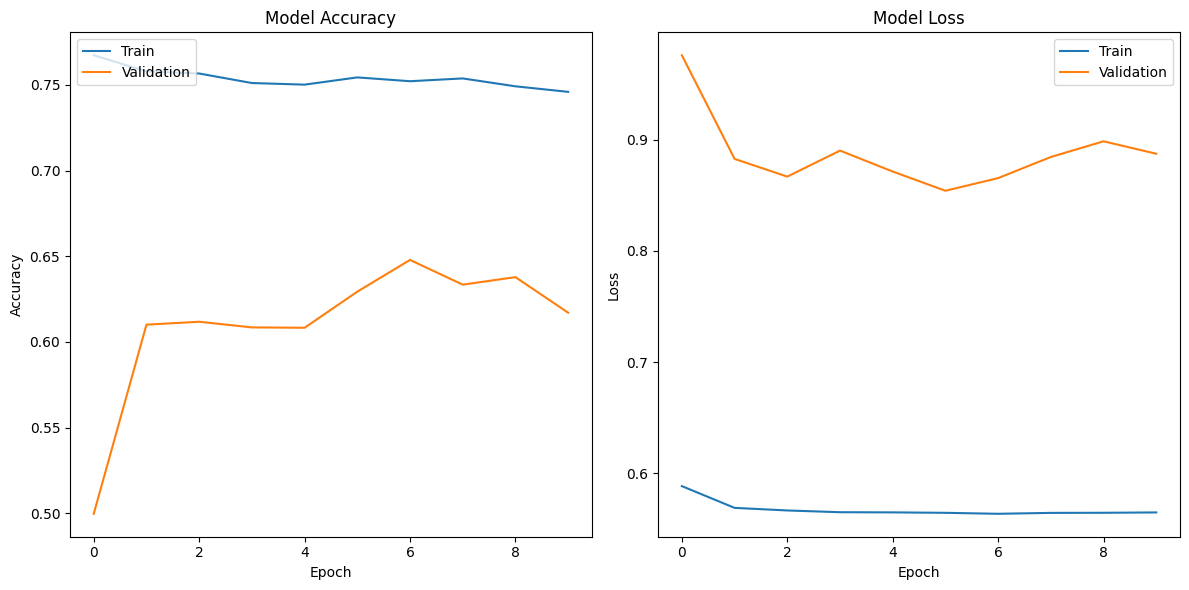

In [ ]:
# Plot Model Accuracy and Model Loss for Train and Validation

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

27869/27869 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step
27869/27869 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - accuracy: 0.6198 - loss: 0.8908
Test Loss: 0.8856406807899475
Test Accuracy: 0.6210486888885498
                precision    recall  f1-score   support

Not Fraudulent       0.96      0.60      0.73    425609
    Fraudulent       0.05      0.42      0.08     20290

      accuracy                           0.59    445899
     macro avg       0.50      0.51      0.41    445899
  weighted avg       0.91      0.59      0.70    445899

Accuracy of the Model: 58.8%


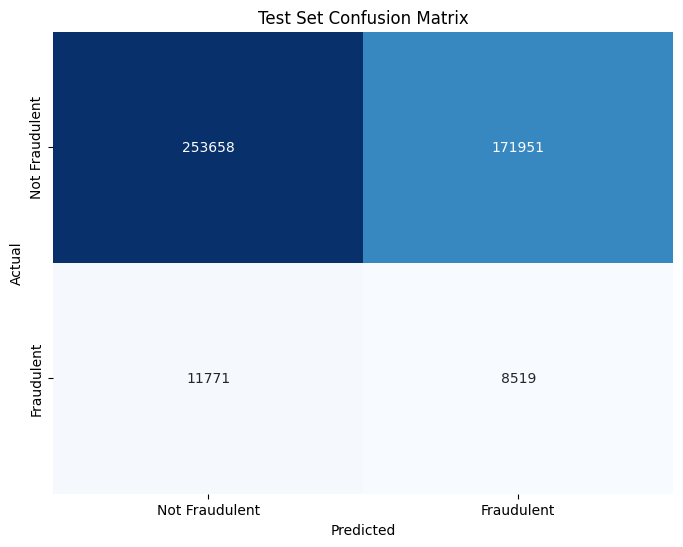

In [ ]:
# Determine the predicted classes for the test dataset, get true labels, load the model history, plot classification report and confusion matrix

# Load the trained model
loaded_model = tf.keras.models.load_model('gru_fd_model1.h5')

# Predict probabilities for the test data
y_pred_prob = loaded_model.predict(test_dataset)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Extract true labels from the test dataset
y_true = []
for _, label in test_dataset:
    y_true.extend(label.numpy())
y_true = np.array(y_true)

# Load the model training history
with open("gru_training_history_fd1.pkl", "rb") as file:
    history = pickle.load(file)

# Evaluate the model on test data
test_loss, test_accuracy = loaded_model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print classification report
print(classification_report(y_true, y_pred, target_names=["Not Fraudulent", "Fraudulent"]))

# Print accuracy
print("Accuracy of the Model: {:.1f}%".format(accuracy_score(y_true, y_pred) * 100))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=["Not Fraudulent", "Fraudulent"], yticklabels=["Not Fraudulent", "Fraudulent"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Set Confusion Matrix")
plt.show()

6499/6499 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6499/6499 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.6133 - loss: 0.8959
Validation Loss: 0.8872189521789551
Validation Accuracy: 0.6170558333396912
                precision    recall  f1-score   support

Not Fraudulent       0.96      0.59      0.73     99277
    Fraudulent       0.05      0.42      0.08      4699

      accuracy                           0.59    103976
     macro avg       0.50      0.51      0.41    103976
  weighted avg       0.92      0.59      0.70    103976

Accuracy of the Model on Validation Set: 58.6%


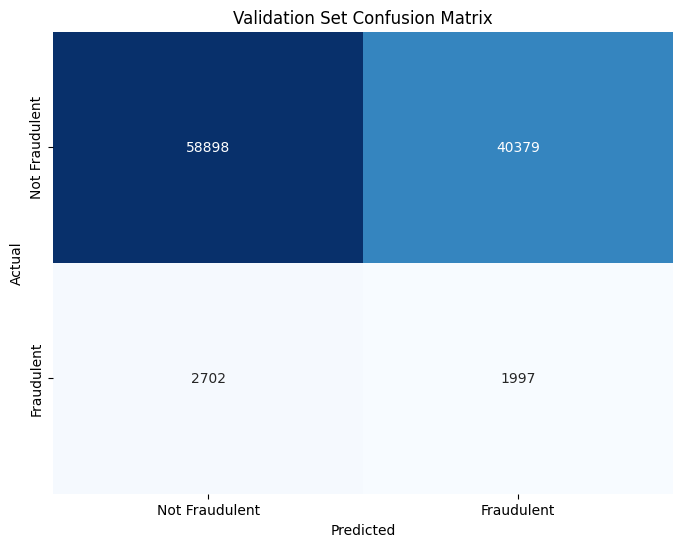

In [ ]:
# Determine the predicted classes for the validation dataset, get true labels, load the model history, plot classification report and confusion matrix

# Load the trained model
loaded_model = tf.keras.models.load_model('gru_fd_model1.h5')

# Predict probabilities for the validation data
y_val_pred_prob = loaded_model.predict(val_dataset)
y_val_pred = (y_val_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Extract true labels from the validation dataset
y_val_true = []
for _, label in val_dataset:
    y_val_true.extend(label.numpy())
y_val_true = np.array(y_val_true)

# Load the model training history
with open("gru_training_history_fd1.pkl", "rb") as file:
    history = pickle.load(file)

# Evaluate the model on validation data
val_loss, val_accuracy = loaded_model.evaluate(val_dataset)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Print classification report for validation data
print(classification_report(y_val_true, y_val_pred, target_names=["Not Fraudulent", "Fraudulent"]))

# Print accuracy for validation data
print("Accuracy of the Model on Validation Set: {:.1f}%".format(accuracy_score(y_val_true, y_val_pred) * 100))

# Plot confusion matrix for validation data
cm_val = confusion_matrix(y_val_true, y_val_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=["Not Fraudulent", "Fraudulent"], yticklabels=["Not Fraudulent", "Fraudulent"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Set Confusion Matrix")
plt.show()